In [56]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
# import plotly.express as px

from scipy import stats
import statsmodels.stats.api as sms
import plotly.graph_objects as go

In [57]:
sb.set_style('darkgrid')
plt.style.use('bmh')

In [58]:
df = pd.read_csv("./Glassdoor_GPG.csv")
df.head() 

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,508356,9938
1,Software Engineer,Male,21,5,College,Management,5,1301712,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,1082496,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,1296960,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,1193568,9319


In [59]:
print('Number of Observations and Variables in the dataset  = ' ,df.shape) 
print(" ")
df.info()

Number of Observations and Variables in the dataset  =  (1000, 9)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [60]:
# Show number of unique values for each Column (Variable)
print(df.nunique())


JobTitle      10
Gender         2
Age           48
PerfEval       5
Education      4
Dept           5
Seniority      5
BasePay      992
Bonus        941
dtype: int64


In [61]:
# Checking for Missing Values
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [62]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,41.393000,3.037000,2.971000,1.133672e+06,6467.161000
std,14.294856,1.423959,1.395029,3.040499e+05,2004.377365
min,18.000000,1.000000,1.000000,4.104960e+05,1703.000000
25%,29.000000,2.000000,2.000000,9.222030e+05,4849.500000
50%,41.000000,3.000000,3.000000,1.119930e+06,6507.000000
75%,54.250000,4.000000,4.000000,1.338696e+06,8026.000000
max,65.000000,5.000000,5.000000,2.156712e+06,11293.000000


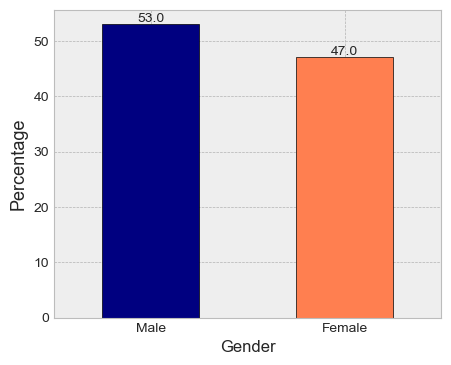

In [63]:
gender_distr = round(df.Gender.value_counts() / len(df) *100, ndigits=0)

color = ['navy', 'coral']

gender_distr.plot.bar(rot = 0 , ec = 'black',  figsize =(5,4), color=color)
plt.title("", size= 13, loc= 'left')
plt. ylabel('Percentage', size=13)

for i in range(len(gender_distr)):
    plt.text(i, gender_distr[i], gender_distr[i], ha = 'center', va ='bottom')

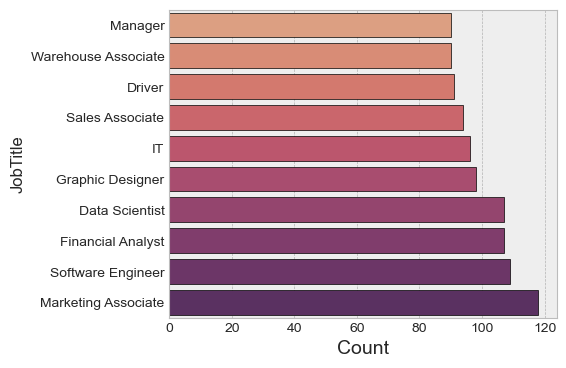

In [64]:
# Job Title Distribution
plt.figure(figsize =(5,4))
professions = df.groupby('JobTitle').count().sort_values(by ='Age')
sb.barplot(data = professions , y = professions.index , x = 'Gender', palette= "flare", ec = 'black')
plt.title('', size= 14);
plt. xlabel('Count', size=14);

In [65]:
# Job Title Distribution by Gender
Job_by_gender = pd.crosstab(df['JobTitle'], df['Gender']).reset_index()

# Initialize a figure
fig = go.Figure()

# Add traces for each gender
for gender, color in zip(['Female', 'Male'], ['navy', 'coral']):
    fig.add_trace(go.Bar(
        x=Job_by_gender['JobTitle'],
        y=Job_by_gender[gender],
        name=gender,
        marker_color=color
    ))

# Update the layout
fig.update_layout(
    barmode='group',
    title="",
    xaxis_title="Job Title",
    yaxis_title="Count",
    width=820,
    height=550
)

fig.show()

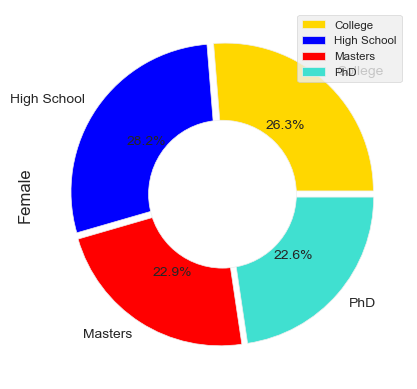

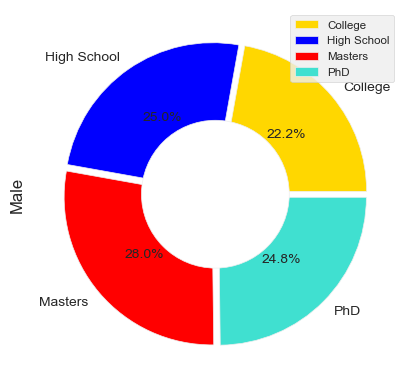

In [66]:
# Distribution of Educational Levels by Gender - PIE CHART

edu_by_gender = pd.crosstab(df['Education'], df['Gender'], normalize=False , margins=False)

colors = ['gold', 'blue', 'red', 'turquoise', 'purple', 'orange'] # Add more colors if you have more categories

explode = (0.03, 0.03, 0.03, 0.03)

# Plotting for Female
edu_by_gender.plot.pie(y='Female', autopct="%.1f%%", explode=explode, colors=colors)
plt.legend(loc='best', fontsize='small')

circle = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gca().add_artist(circle)

plt.title("", size=20)
plt.show()  # Show the first plot

# Plotting for Male
edu_by_gender.plot.pie(y='Male', autopct="%.1f%%", explode=explode, colors=colors)
plt.legend(loc='best', fontsize='small')

circle = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gca().add_artist(circle)

plt.title("", size=20)
plt.show()  # Show the second plot

In [67]:
# Distribution of Gender by Department
dept_distr = df.pivot_table(index='Dept', columns='Gender', values='BasePay', aggfunc='count')

# Create the pivot table
dept_distr = df.pivot_table(index='Dept', columns='Gender', values='BasePay', aggfunc='count').reset_index()

# Define colors for each gender
colors = {'Female': 'navy', 'Male': 'coral'}

# Initialize a figure
fig = go.Figure()

# Add traces for each gender
for gender in dept_distr.columns[1:]:  # Assuming first column is 'Dept' and others are genders
    fig.add_trace(go.Bar(
        x=dept_distr['Dept'],
        y=dept_distr[gender],
        name=gender,
        marker_color=colors[gender]
    ))

# Update the layout
fig.update_layout(
    barmode='group',
    xaxis_title="Department",
    yaxis_title="Count",
    width=700,
    height=500
)

fig.show()


In [68]:
# Mean Seniority (No. of Years Worked) by Gender.
print("Average Number of Years Worked")
df.groupby('Gender')['Seniority'].mean()

Average Number of Years Worked


Gender
Female    3.012821
Male      2.934211
Name: Seniority, dtype: float64

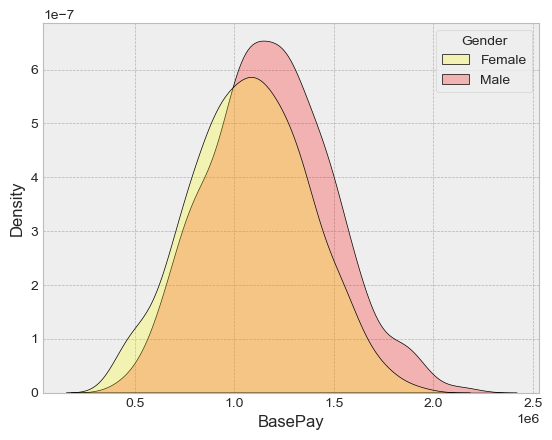

In [69]:
# Distribution of BasePay by Gender - Density Plot

# Define your color palette here
palette = {"Male": "red", "Female": "yellow"}

# Create the KDE plot
sb.kdeplot(x='BasePay', hue='Gender', data=df, fill=True, ec='black', palette=palette)
plt.title('', size=14)
plt.show()

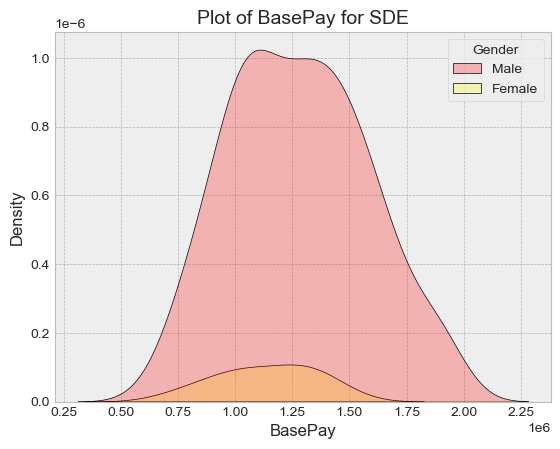

In [70]:
# Filter the DataFrame for software engineering positions
software_engineering_df = df[df['JobTitle'] == 'Software Engineer']

# Define your color palette here
palette = {"Male": "red", "Female": "yellow"}

# Create the KDE plot for software engineering positions
sb.kdeplot(x='BasePay', hue='Gender', data=software_engineering_df, fill=True, ec='black', palette=palette)
plt.title('Plot of BasePay for SDE', size=14)
plt.show()


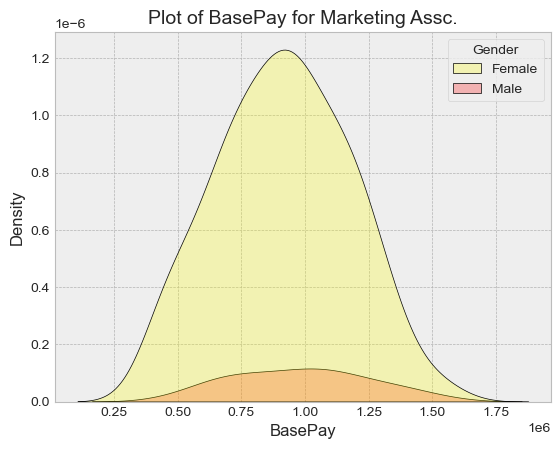

In [71]:
# Filter the DataFrame for Marketing Associate positions
marketing_associate_df = df[df['JobTitle'] == 'Marketing Associate']

# Define your color palette here
palette = {"Male": "red", "Female": "yellow"}

# Create the KDE plot for Marketing Associate positions
sb.kdeplot(x='BasePay', hue='Gender', data=marketing_associate_df, fill=True, ec='black', palette=palette)
plt.title('Plot of BasePay for Marketing Assc.', size=14)
plt.show()

In [72]:
# Average BasePay of Males and Females by Job Title 
basepay_by_gender = round(df.pivot_table(index= 'JobTitle', columns='Gender', values = 'BasePay', aggfunc='mean', margins= False,) , ndigits=2)

# Define colors for each gender
colors = {'Male': 'navy', 'Female': 'coral'}

# Initialize a figure
fig = go.Figure()

# Add traces for each gender
for gender, color in colors.items():
    fig.add_trace(go.Bar(
        x=basepay_by_gender.index,
        y=basepay_by_gender[gender],
        name=gender,
        marker_color=color
    ))

# Update the layout
fig.update_layout(
    barmode='group',
    xaxis_title="Job Title",
    yaxis_title="Average BasePay",
    width=720,
    height=550
)

fig.show()

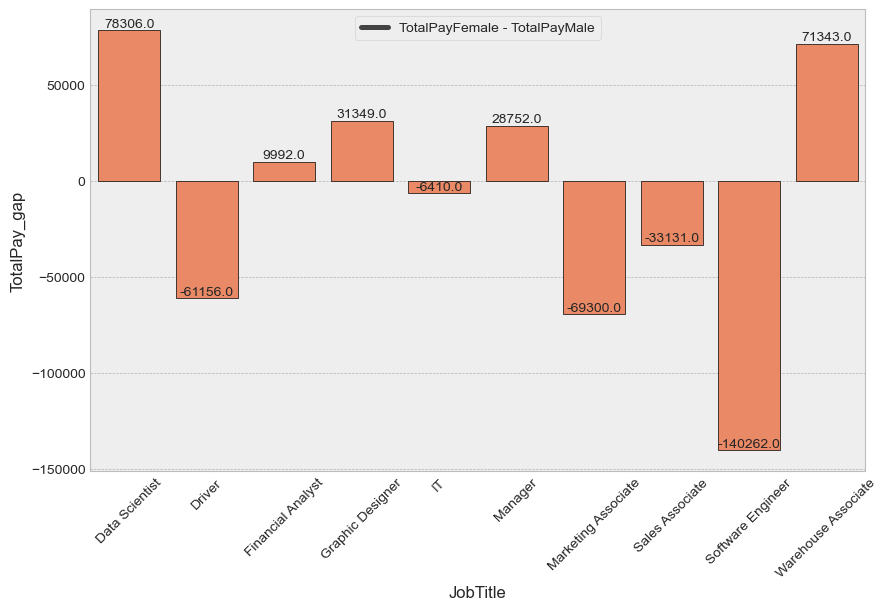

In [73]:
# Calculating Total Pay
df['TotalPay'] = df.BasePay + df.Bonus
totalpay_by_gender = df.pivot_table(index = 'JobTitle', columns ='Gender',  values = 'TotalPay', aggfunc = 'mean')
totalpay_by_gender['TotalPay_gap'] = totalpay_by_gender['Female'] - totalpay_by_gender['Male']
totalpay_by_gender

# Plotting the difference in Total Pay for each Job Title
plt.figure(figsize=(10,6))
sb.barplot(data = totalpay_by_gender , y = 'TotalPay_gap' , x=totalpay_by_gender.index, ec = 'black', color = 'coral')
plt.xticks(rotation=45);
plt.legend(['TotalPayFemale - TotalPayMale'] ,loc = 9)

for i in range(len(totalpay_by_gender)):
    plt.text(i, totalpay_by_gender.TotalPay_gap[i], round(totalpay_by_gender.TotalPay_gap[i], ndigits=0), ha = 'center', va ='bottom')

In [74]:
bonus_by_gender = round(df.pivot_table(index= 'JobTitle', columns='Gender', values = 'Bonus', aggfunc='median') , ndigits= 0)

# px.bar(bonus_by_gender[['Male' , 'Female']], barmode= 'group', width=720, height=550, title = 'Figure 9: Average Bonus of Males and Females by Job Title')

# Define colors for each gender
colors = {'Male': 'navy', 'Female': 'coral'}

# Initialize a figure
fig = go.Figure()

# Add traces for each gender
for gender, color in colors.items():
    fig.add_trace(go.Bar(
        x=bonus_by_gender.index,
        y=bonus_by_gender[gender],
        name=gender,
        marker_color=color
    ))

# Update the layout
fig.update_layout(
    barmode='group',
    xaxis_title="Job Title",
    yaxis_title="Median Bonus",
    width=720,
    height=550
)

fig.show()

In [75]:
male_grp = df.groupby('Gender').get_group("Male")[['BasePay' , 'Bonus']]
female_grp = df.groupby('Gender').get_group("Female")[['BasePay' , 'Bonus']]

print ('Table 1: SUMMARY STATISTICS OF BASE PAY BY GENDER')
pd.concat( [male_grp.describe(), female_grp.describe()], keys=['male', 'female'] )

Table 1: SUMMARY STATISTICS OF BASE PAY BY GENDER


BasePay         Bonus
male   count  5.320000e+02    532.000000
       mean   1.181491e+06   6461.133459
       std    3.062102e+05   2001.756231
       min    4.397040e+05   1703.000000
       25%    9.774300e+05   4853.250000
       50%    1.178676e+06   6480.500000
       75%    1.387275e+06   7989.000000
       max    2.156712e+06  11293.000000
female count  4.680000e+02    468.000000
       mean   1.079314e+06   6474.012821
       std    2.925393e+05   2009.473239
       min    4.104960e+05   1884.000000
       25%    8.782350e+05   4841.000000
       50%    1.078962e+06   6553.000000
       75%    1.283079e+06   8090.000000
       max    1.927368e+06  10768.000000

<Axes: xlabel='BasePay', ylabel='Gender'>

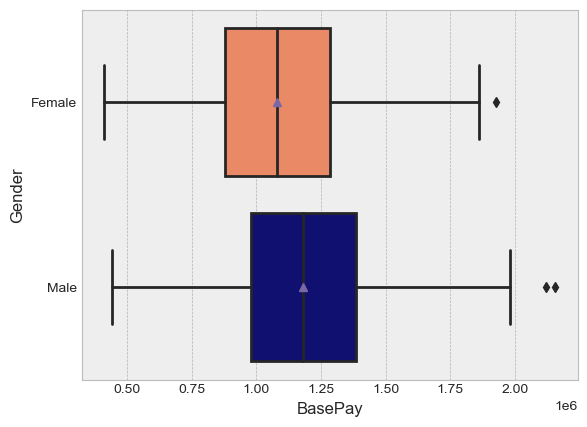

In [76]:
# Distribution of BasePay by Gender - BoxPlot 
# palette = {"Male": "turquoise", "Female": "lightpink"}
palette = {"Male" : "navy", "Female" : "coral"}
sb.boxplot(x=df['BasePay'], y=df['Gender'], showmeans=True, linewidth=2, palette=palette)
# plt.title('Figure 10: Distribution of Base Pay by Gender', size = 15);

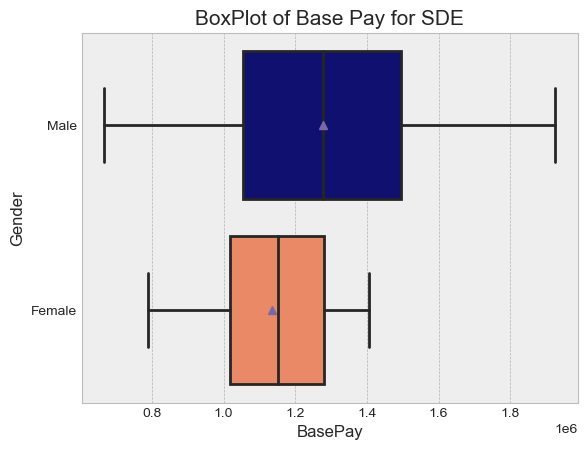

In [77]:
# Filter the DataFrame for software engineering positions
software_engineering_df = df[df['JobTitle'] == 'Software Engineer']

palette = {"Male": "navy", "Female": "coral"}
# Create a boxplot for BasePay distribution in Software Engineering by Gender
sb.boxplot(x=software_engineering_df['BasePay'], y=software_engineering_df['Gender'], showmeans=True, linewidth=2, palette=palette)
plt.title('BoxPlot of Base Pay for SDE', size=15)
plt.show()

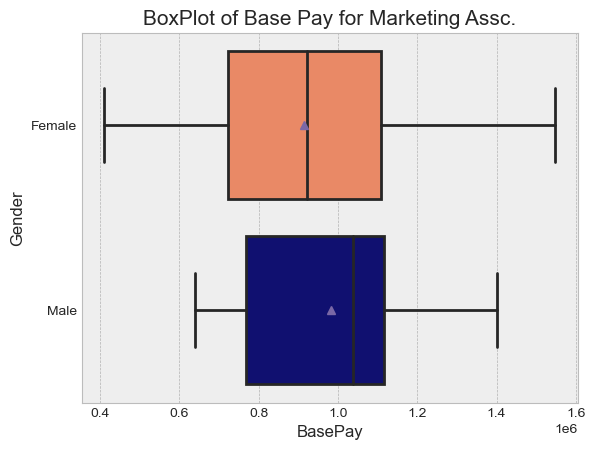

In [78]:
marketing_associate_df = df[df['JobTitle'] == 'Marketing Associate']
palette = {"Male": "navy", "Female": "coral"}
sb.boxplot(x=marketing_associate_df['BasePay'], y=marketing_associate_df['Gender'], showmeans=True, linewidth=2, palette=palette)
plt.title('BoxPlot of Base Pay for Marketing Assc.', size=15)
plt.show()

In [79]:
# OUTLERS

outlier_male_pay = df.groupby('Gender').get_group("Male").nlargest(columns = "BasePay", n=2)
outlier_female_pay =  df.groupby('Gender').get_group("Female").nlargest(columns = "BasePay", n=1)

print('TABLE 2: OUTLIERS IN DATASET')
pd.concat([outlier_male_pay , outlier_female_pay] ,  keys=['male', 'female'] )

TABLE 2: OUTLIERS IN DATASET


JobTitle  Gender  Age  PerfEval Education        Dept  Seniority  \
male   927  Manager    Male   58         1       PhD  Management          4   
       353  Manager    Male   59         4       PhD       Sales          5   
female 357  Manager  Female   60         4       PhD  Management          3   

            BasePay  Bonus  TotalPay  
male   927  2156712   4284   2160996  
       353  2121468   6773   2128241  
female 357  1927368   8354   1935722

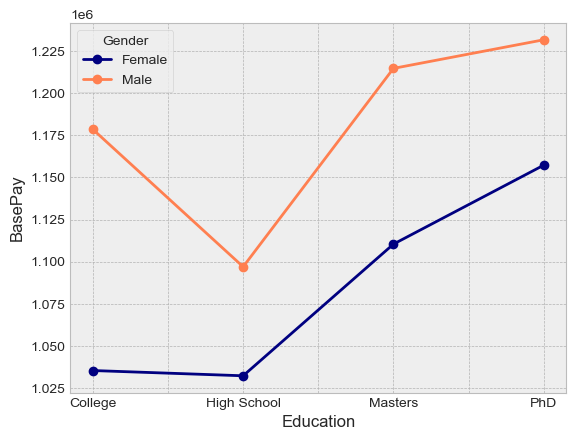

In [80]:
# Mean BasePay by Education.

# Assuming df is your DataFrame and you've already created the pivot table
pivot_table = df.pivot_table(index='Education', columns='Gender', values='BasePay', aggfunc="mean")

# Define the colors for each line
colors = ['navy', 'coral']  # For example, green for Male and red for Female

# Create the line plot with custom colors
pivot_table.plot.line(marker='o', color=colors)
plt.ylabel("BasePay")
plt.show()

<Axes: xlabel='Dept', ylabel='BasePay'>

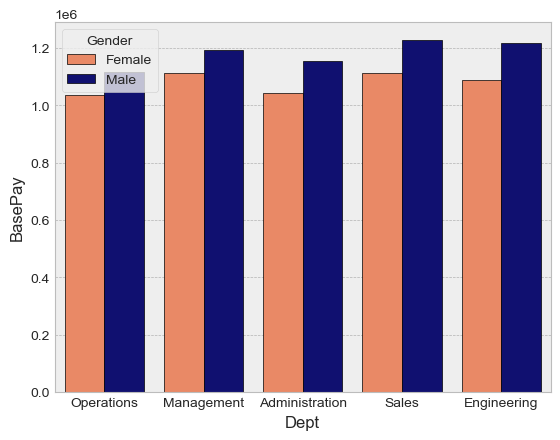

In [81]:
# Average Base Pay of Males and females by Department - Column Chart

palette = {"Male": "navy", "Female": "coral"}

sb.barplot(data = df, x= 'Dept', y = 'BasePay', hue = 'Gender', ec ='black', palette=palette, errorbar=None)
# plt.title('Figure 12: Average Base Pay by Department', size = 14);

<Axes: xlabel='Seniority', ylabel='BasePay'>

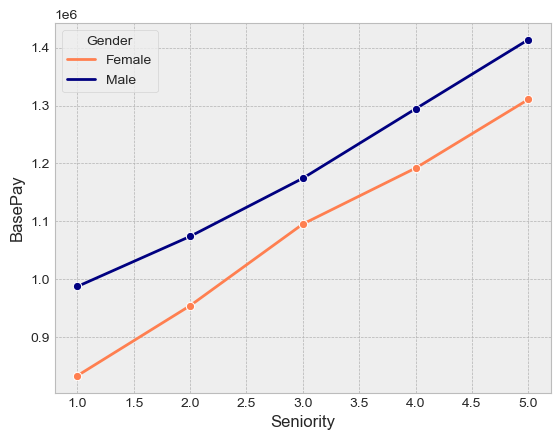

In [82]:
# Distribution of Mean BasePay by Seniority and Gender - (Seaborn) LINE CHART
# Define your color palette here
palette = {"Male": "navy", "Female": "coral"}
sb.lineplot(data = df, x='Seniority', y= 'BasePay', hue = "Gender" , marker = 'o', errorbar = None, palette=palette)
# plt.title('Figure 13: Average Base Pay by Seniority', size = 14);

In [83]:
jobs = df.JobTitle.unique()
jobs

# Highest Pay for all Professions by Gender
max_pay_list_by_gender = pd.DataFrame(columns= ["JobTitle", "BasePay"])

for jobname in jobs:
    max_pay = df[df.JobTitle == jobname].groupby('Gender').max()[["JobTitle", "BasePay"]]
    max_pay_list_by_gender = pd.concat([max_pay_list_by_gender , max_pay])
 
print( 'Table 3: highest pay for each profession by gender'.upper()) 
max_pay_list_by_gender    

TABLE 3: HIGHEST PAY FOR EACH PROFESSION BY GENDER


,JobTitle,BasePay
Female,Graphic Designer,1604892
Male,Graphic Designer,1626144
Female,Software Engineer,1405572
Male,Software Engineer,1925520
Female,Warehouse Associate,1609308
Male,Warehouse Associate,1607124
Female,IT,1587204
Male,IT,1982748
Female,Sales Associate,1710060
Male,Sales Associate,1634508


In [84]:
# Crosstab between gender and Performance Evaluation Score.
gen_perf_eval = pd.crosstab(df.Gender , df.PerfEval)
print("Table 4: Crosstab - Gender and Performance Evaluation Score.".upper())
gen_perf_eval

TABLE 4: CROSSTAB - GENDER AND PERFORMANCE EVALUATION SCORE.


PerfEval,1,2,3,4,5
Gender,,,,,
Female,106,90,88,96,88
Male,92,102,106,111,121


In [85]:
# Chi-Square Test for the above hypothesis:
chi = stats.chi2_contingency(gen_perf_eval)
chi

Chi2ContingencyResult(statistic=5.634564094743166, pvalue=0.22815195929022594, dof=4, expected_freq=array([[ 92.664,  89.856,  90.792,  96.876,  97.812],
       [105.336, 102.144, 103.208, 110.124, 111.188]]))

In [86]:
male_pay = df.query('Gender== "Male"')['BasePay']
female_pay = df[df.Gender =='Female']['BasePay']

In [87]:
stats.levene(female_pay, male_pay)

LeveneResult(statistic=0.6747326671419751, pvalue=0.4116026121328914)

In [88]:
# T-Test model
model = sms.CompareMeans.from_data(female_pay, male_pay)

In [89]:
# Independent samples T-Test with Equal variances.

print('Independent Samples ', model.summary(use_t=True, alpha=0.05 , usevar='pooled'))

Independent Samples                            Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1  -1.022e+05    1.9e+04     -5.376      0.000   -1.39e+05   -6.49e+04
